# **GRADED ASSIGNMENT 2**

This is a programming task dedicated to the method of least squares.

First, make your own copy of the notebook (*File $\rightarrow$ Save a copy in Drive*) or download the notebook to your machine if you prefer to work locally (*File $\rightarrow$ Download*).

Then, implement your solutions to the tasks formulated in the notebook. You can add **code cells** to write some code and **text cells** in case you want to include additional explanations to your answers in plain English.

Finally, save your notebook as a .pdf file and attach it to the submission form. **Make sure that all the cells are executed and all relevant outputs are being printed out**.


In [52]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## **Loading the data**

<img src="https://thumbor.forbes.com/thumbor/fit-in/960x/https://www.forbes.com/wheels/wp-content/uploads/2020/08/dealer-lot-copy.jpg" width="400">

In this part of the assignment, you will be working with a toy dataset that contains infromation about ages and prices of 25 cars. Run the cell below to load the data in memory:

In [53]:
age = np.array([ 6., 26., 14., 38., 20., 31., 10.,  7.,  9.,  7., 5., 16., 20.,
                 33., 37., 26., 37., 42.,  3.,  1.,  4., 2., 31., 39., 44.])

price = np.array([19000.,  5500., 24500., 32000.,  7500., 12500., 24000., 46500.,
                  20000., 46500., 67500.,  3000., 17000., 30000., 38500.,  3500.,
                  38500.,  60000., 36000., 93500., 22500., 38500., 12500., 37500.,
                  74500.])

## **Task 1: A simple model** *(2 points)*

Imagine that you need to predict car's price based on its age. To that end, as a strating point, you decide to model the relationship between the two as a linear function:

$$car\_price = w_0 + w_1 \cdot car\_age$$

*(1 point)* **Fit a straight line to the data available using the method of least squares. What are the optimal values for the model coefficients $w_0$ and $w_0$ that you have obtained?**

<font color='red'>Do **not** use any readily-available implementation of the linear regression model. Instead, implement your own solution based on what we have derived during exercise session 3.</font>

In [54]:
# TODO: your code here
X = np.c_[np.ones((len(age),1)),age]
y = np.reshape(price,(len(price),1))
w_old = np.linalg.inv(X.T@X)@X.T@y
print('W0:' + str(w_old[0]))
print('W1:' + str(w_old[1]))


W0:[33976.48378028]
W1:[-75.61435927]


*(1 point)* **Make a plot that would visualize the original data, as well as the predictions obtained by your model.**

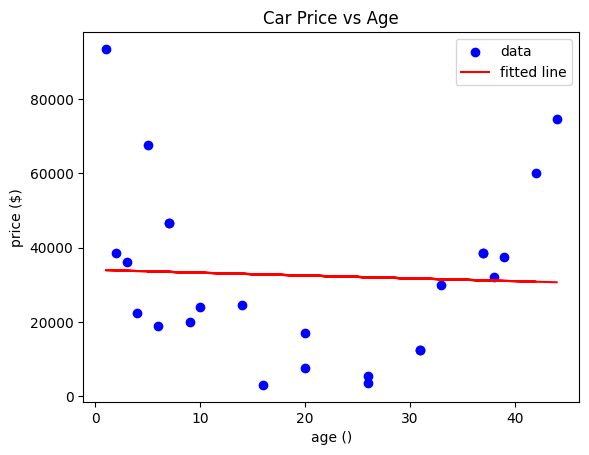

In [55]:
# TODO: your code here
pridicted_price = age * w_old[1] + w_old[0]
plt.scatter(age,price,label='data',color='blue')
plt.plot(age,pridicted_price,label='fitted line',color='red')
plt.xlabel('age ()')
plt.ylabel('price ($)')
plt.title('Car Price vs Age')
plt.legend()
plt.show()

## **Task 2: Improving the fit** *(2 points)*

From the visualization you have obtained above, you can notice that the nature of the relationship between car age and its price is not linear. Indeed, both very new and very old cars can be expensive, while moderately old cars are generally cheaper. Thus, car price can be better modelled as a *quadratic* function of its age:

$$car\_price = w_0 + w_1 \cdot car\_age + w_2 \cdot car\_age^2$$

*(2 points)* **Explain how you can use the method of least squares to fit such
a quadratic curve to the data. Implement your solution and report the optimal values of the model coefficients $w_0, w_1$ and $w_2$**.


To model the car price as a quadratic function of its age, we need to adjust our regression equation to account for the squared term of the car's age. The new model is:

$$ price = w_0 − w_1 \cdot age + w_2 \cdot age^2$$
Now we will fit the quardatic curve using following these steps


1.   We will expand the original features to include both the $age$ and $age^2$
2.   This will create a system of linear equations with 3 columns each representing $w_0, w_1, w_2$.We will solve for $w_0, w_1, w_2$
3. System can be represented as $$ y = Xw$$ where $w = [w_0,w_1,w_2]$
4. We will use least square method to solve for $w^*$
$$ w^* = (X^T \cdot X) \cdot X^T \cdot y $$
5. After we get $w$ we will get the projection $y^*$
$$y^* = X \cdot w^* $$
$$y^* = X \cdot (X^T \cdot X) \cdot X^T \cdot y$$
where $$ X \cdot (X^T \cdot X) \cdot X^T = projection \ matrix$$




In [56]:
# TODO: your code here
X = np.column_stack((np.ones_like(age),age,age**2))
y = np.reshape(price,(len(price),1))
w = np.linalg.inv(X.T@X)@X.T@y
print('W0:' + str(w[0]))
print('W1:' + str(w[1]))
print('W2:' + str(w[2]))
age_range = np.linspace(min(age),max(age),100)          ## I used 100 points for smooth fitting
predicted_price = w[0] + w[1] * age_range + w[2] * age_range**2

W0:[67864.16676265]
W1:[-5679.30899716]
W2:[129.93792575]


*(1 point)* **Make a plot that would visualize the original data, as well as the predictions obtained by the updated model.**

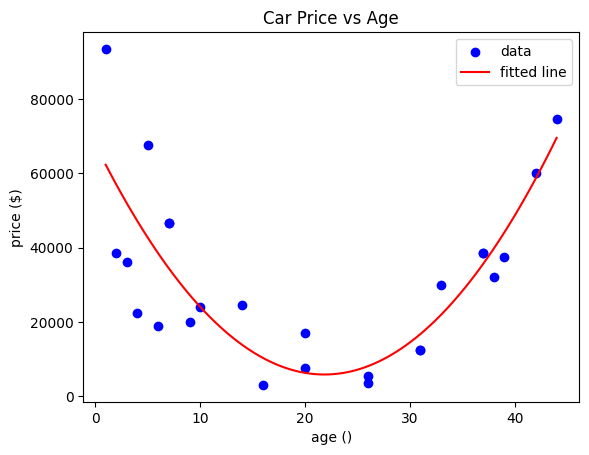

In [57]:
# TODO: your code here
plt.scatter(age,price,label='data',color='blue')
plt.plot(age_range,predicted_price,label='fitted line',color='red')
plt.xlabel('age ()')
plt.ylabel('price ($)')
plt.title('Car Price vs Age')
plt.legend()
plt.show()


## **Task 3: Least Squares via $QR$ factorization** *(6 points)*

Solving $Xw = y$ using the method of least squares the way we have derived during the exercise session involves constructing the pseudo-inverse of the input data matrix $X$, which can be computationally expensive when $X$ is large.

A trick often used in practice is to decompose $X$ into a product of two matrices, $X = QR$, such that $Q$ is an *orthogonal* matrix, where column vectors are orthogonal  to each other and have unit lengths, and $R$ is an *upper-triangular* matrix.

Replacing $X$ by the product of $Q$ and $R$ significantly simplifies and speeds up computing the unknown $w$ due to the special properties of these matrices.

**Your task is to fit a simple model $car\_price = w_0 + w_1 \cdot car\_age$ from Task 1 once again, but this time estmating the unknown coefficients using the $QR$ factorization.**

**First, watch the following videos to learn more about $QR$-factorization and how it is used to solve least squares problems in the following videos:**
- [An Example of QR Factorization](https://youtu.be/VsyNkUo88NM)
- [Using QR Factorization to Solve Least-Squares Problems](https://youtu.be/-QY5iwNr9I4)

**When you are done, proceed with the tasks below.**


*(1 point)* **Is it possible to perform the $QR$-factorization of the matrix $X$? Answer this question by checking if columns of $X$ are linearly independent. Explain.**

*Hint: you can use [$\texttt{np.linalg.matrix_rank()}$](https://numpy.org/doc/stable/reference/generated/numpy.linalg.matrix_rank.html) function to quickly compute rank of a matrix.*


In [58]:
# TODO: your code here
X = np.column_stack((np.ones_like(age),age))
matrix_rank = np.linalg.matrix_rank(X)
num_of_cols = X.shape[1]
if num_of_cols == matrix_rank:
  print('All columns of X are linearly independent. X is a full rank matrix. So it is possible to compute QR factorization of matrix X.')
else:
  print('All columns of X are not linearly independent. X is not a full rank matrix. So it is not possible to compute QR factorization of matrix X.')

All columns of X are linearly independent. X is a full rank matrix. So it is possible to compute QR factorization of matrix X.


**Now, perform the $QR$-decomposition of $X$ following the steps below.**

<font color='red'>Do **not** use any readily-available implementation of the $QR$-factorization. Instead, implement your own solution from scratch based on the tutorials provided above.</font>

*(1 point)* **First, construct matrix $Q$ and print it out.**

In [59]:
# TODO: your code here
x1 = X[:,0]
x2 = X[:,1]
## Gram Schmidt Process
c2 = np.dot(x2,x1)/np.dot(x1,x1)
v2 = x2 - c2*x1
## Finding orthonormal Basis vectors
u1 = x1 / np.linalg.norm(x1)
u2 = v2 / np.linalg.norm(v2)
Q = np.column_stack((u1,u2))
print(f"Q : {Q}")


Q : [[ 0.2        -0.20120299]
 [ 0.2         0.07980677]
 [ 0.2        -0.08879908]
 [ 0.2         0.24841263]
 [ 0.2        -0.00449616]
 [ 0.2         0.15005921]
 [ 0.2        -0.14500104]
 [ 0.2        -0.1871525 ]
 [ 0.2        -0.15905153]
 [ 0.2        -0.1871525 ]
 [ 0.2        -0.21525348]
 [ 0.2        -0.06069811]
 [ 0.2        -0.00449616]
 [ 0.2         0.17816019]
 [ 0.2         0.23436214]
 [ 0.2         0.07980677]
 [ 0.2         0.23436214]
 [ 0.2         0.30461458]
 [ 0.2        -0.24335445]
 [ 0.2        -0.27145543]
 [ 0.2        -0.22930397]
 [ 0.2        -0.25740494]
 [ 0.2         0.15005921]
 [ 0.2         0.26246312]
 [ 0.2         0.33271556]]


*(0.5 points)* **Verify that $Q$ is indeed orthogonal by showing that $Q^{-1} = Q^T$ (or, equivalently, that $Q^TQ = E$).**

In [60]:
# TODO: your code here
Q_T = np.transpose(Q)
print(Q_T@Q)

[[ 1.00000000e+00 -6.01439392e-17]
 [-6.01439392e-17  1.00000000e+00]]


*(1 point)* **Second, construct matrix $R$. Print it out and verify that it is indeed an upper-triangular matrix.**

In [61]:
# TODO: your code here
R = Q_T @ X
R

array([[ 5.00000000e+00,  1.01600000e+02],
       [-2.22044605e-16,  7.11719046e+01]])

*(0.5 point)* **Verify that $X = QR$**.

In [62]:
# TODO: your code here
X_new = Q@R
if (np.allclose(X_new,X)):
  print("Values in X and X_new are equal ")
else:
  print("Values in X and X_new are not equal ")

Values in X and X_new are equal 


*(2 point)* **Finally, perform least squares via $QR$ factorization. To do so, express $w$ in terms of $Q, R$ and $y$ and compute its value.**

**Compare the coefficients that you get to those obtained in the previous tasks.**

In [66]:
# TODO: your code here
w_new = np.linalg.inv(R)@Q_T@y            # [w0,w1] = R^-1 * transpose(Q) * y
if (np.allclose(w_new,w_old)):
  print('Values in w_old and w_new are equal ')
else:
  print('Values in w and w_new are not equal')
print('w_new using QR Factorization', w_new)
print("w_old using Closed Form Solution : ",w_old)

Values in w_old and w_new are equal 
w_new using QR Factorization [[33976.48378028]
 [  -75.61435927]]
w_old using Closed Form Solution :  [[33976.48378028]
 [  -75.61435927]]
